# Long term memory: ACF plots of absolute and squared returns of emperical data vs. simulation

In [ ]:
# ACF
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
df_closing_SnP500_39_years_clean = pd.read_csv('data/df_closing_SnP500_39_years_clean.csv', parse_dates = True, index_col = 'Date')

In [ ]:
df_closing_SnP500_39_years_clean

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
1984-01-02,44.00,24.60,41.70,25.625,35.00,23.625,46.000,21.25,15.17,13.75,...,33.750,13.01,36.750,36.625,8.75,24.25,29.125,29.76,18.25,35.00
1984-01-03,44.00,24.60,41.70,25.625,35.00,23.625,46.000,21.25,15.17,13.75,...,33.750,13.01,36.750,36.625,8.75,24.25,29.125,29.76,18.25,35.00
1984-01-04,44.00,24.60,41.70,27.875,35.00,23.625,47.500,21.25,15.17,13.75,...,34.125,13.01,37.000,37.125,8.75,24.25,29.125,29.76,18.25,35.00
1984-01-05,44.00,24.60,41.70,28.250,35.00,23.625,48.000,21.25,15.17,13.75,...,35.000,13.01,37.250,37.375,8.75,24.25,29.125,29.76,18.25,35.00
1984-01-06,44.00,24.60,41.70,27.750,35.00,23.625,47.875,21.25,15.17,13.75,...,34.750,13.01,37.625,37.375,8.75,24.25,29.125,29.76,18.25,35.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,149.23,12.71,143.28,131.860,163.10,170.010,108.180,63.38,266.09,338.45,...,31.490,80.72,70.930,108.680,31.83,109.73,128.900,126.69,248.22,48.45
2022-12-27,149.55,12.53,145.02,130.030,162.99,169.000,108.570,63.62,265.31,335.09,...,31.470,84.33,71.570,110.190,32.07,110.72,129.900,127.28,251.00,48.84
2022-12-28,148.09,12.32,145.30,126.040,162.23,167.360,107.830,62.60,263.12,328.33,...,30.630,80.09,70.570,108.380,30.98,108.94,129.310,125.99,246.84,47.97


In [ ]:
df_closing_DOW_39_years_clean = pd.read_csv('data/df_closing_DOW_39_years_clean.csv', parse_dates = True, index_col = 'Date')


In [ ]:
df_closing_DOW_39_years_clean

,UNH,GS,HD,AMGN,MCD,CAT,MSFT,V,HON,BA,...,MMM,NKE,MRK,DIS,KO,DOW,CSCO,VZ,WBA,INTC
Date,,,,,,,,,,,,,,,,,,,,,
1984-01-02,4.688,70.375,25.25,7.250,69.625,45.875,28.00,56.50,55.625,44.000,...,82.250,14.875,90.375,52.625,53.250,49.80,22.25,67.125,37.750,40.750
1984-01-03,4.688,70.375,25.25,7.250,69.625,45.875,28.00,56.50,55.625,44.000,...,82.250,14.875,90.375,52.625,53.250,49.80,22.25,67.125,37.750,40.750
1984-01-04,4.688,70.375,24.50,7.125,70.875,48.750,28.00,56.50,55.125,45.875,...,84.125,15.375,90.250,53.000,54.875,49.80,22.25,69.125,37.625,41.125
1984-01-05,4.688,70.375,26.00,7.500,72.250,49.000,28.00,56.50,55.625,47.750,...,84.875,15.875,91.500,53.250,55.250,49.80,22.25,69.750,37.750,43.000
1984-01-06,4.688,70.375,25.75,8.000,72.250,48.625,28.00,56.50,54.500,47.625,...,84.625,16.375,91.125,52.750,54.625,49.80,22.25,71.000,37.875,42.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,531.310,345.510,318.73,263.920,267.570,239.870,238.73,205.83,213.870,189.060,...,120.140,116.250,111.860,88.010,63.820,50.86,47.48,38.410,38.630,26.090
2022-12-27,531.990,341.970,319.55,263.390,266.840,243.140,236.96,206.29,214.890,189.400,...,120.220,117.560,112.120,86.370,64.210,51.19,47.53,39.250,38.310,25.940
2022-12-28,528.450,340.870,315.73,261.420,265.110,239.380,234.53,204.99,212.190,188.380,...,118.290,114.980,111.080,84.170,63.570,49.99,47.07,38.810,37.580,25.540


In [ ]:
df_closing_DOW_39_years_clean

,UNH,GS,HD,AMGN,MCD,CAT,MSFT,V,HON,BA,...,MMM,NKE,MRK,DIS,KO,DOW,CSCO,VZ,WBA,INTC
Date,,,,,,,,,,,,,,,,,,,,,
1984-01-02,4.688,70.375,25.25,7.250,69.625,45.875,28.00,56.50,55.625,44.000,...,82.250,14.875,90.375,52.625,53.250,49.80,22.25,67.125,37.750,40.750
1984-01-03,4.688,70.375,25.25,7.250,69.625,45.875,28.00,56.50,55.625,44.000,...,82.250,14.875,90.375,52.625,53.250,49.80,22.25,67.125,37.750,40.750
1984-01-04,4.688,70.375,24.50,7.125,70.875,48.750,28.00,56.50,55.125,45.875,...,84.125,15.375,90.250,53.000,54.875,49.80,22.25,69.125,37.625,41.125
1984-01-05,4.688,70.375,26.00,7.500,72.250,49.000,28.00,56.50,55.625,47.750,...,84.875,15.875,91.500,53.250,55.250,49.80,22.25,69.750,37.750,43.000
1984-01-06,4.688,70.375,25.75,8.000,72.250,48.625,28.00,56.50,54.500,47.625,...,84.625,16.375,91.125,52.750,54.625,49.80,22.25,71.000,37.875,42.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,531.310,345.510,318.73,263.920,267.570,239.870,238.73,205.83,213.870,189.060,...,120.140,116.250,111.860,88.010,63.820,50.86,47.48,38.410,38.630,26.090
2022-12-27,531.990,341.970,319.55,263.390,266.840,243.140,236.96,206.29,214.890,189.400,...,120.220,117.560,112.120,86.370,64.210,51.19,47.53,39.250,38.310,25.940
2022-12-28,528.450,340.870,315.73,261.420,265.110,239.380,234.53,204.99,212.190,188.380,...,118.290,114.980,111.080,84.170,63.570,49.99,47.07,38.810,37.580,25.540


In [ ]:
df_closing_DOW_39_years_clean.columns

Index(['UNH', 'GS', 'HD', 'AMGN', 'MCD', 'CAT', 'MSFT', 'V', 'HON', 'BA',
       'TRV', 'CVX', 'JNJ', 'AXP', 'PG', 'CRM', 'IBM', 'WMT', 'JPM', 'AAPL',
       'MMM', 'NKE', 'MRK', 'DIS', 'KO', 'DOW', 'CSCO', 'VZ', 'WBA', 'INTC'],
      dtype='object')

In [ ]:
returns = df_closing_DOW_39_years_clean.pct_change().dropna()
abs_returns = returns.abs()
squared_returns = returns

In [ ]:
abs_returns

,UNH,GS,HD,AMGN,MCD,CAT,MSFT,V,HON,BA,...,MMM,NKE,MRK,DIS,KO,DOW,CSCO,VZ,WBA,INTC
Date,,,,,,,,,,,,,,,,,,,,,
1984-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1984-01-04,0.000000,0.000000,0.029703,0.017241,0.017953,0.062670,0.000000,0.000000,0.008989,0.042614,...,0.022796,0.033613,0.001383,0.007126,0.030516,0.000000,0.000000,0.029795,0.003311,0.009202
1984-01-05,0.000000,0.000000,0.061224,0.052632,0.019400,0.005128,0.000000,0.000000,0.009070,0.040872,...,0.008915,0.032520,0.013850,0.004717,0.006834,0.000000,0.000000,0.009042,0.003322,0.045593
1984-01-06,0.000000,0.000000,0.009615,0.066667,0.000000,0.007653,0.000000,0.000000,0.020225,0.002618,...,0.002946,0.031496,0.004098,0.009390,0.011312,0.000000,0.000000,0.017921,0.003311,0.005814
1984-01-09,0.000000,0.000000,0.000000,0.015625,0.029412,0.010283,0.000000,0.000000,0.004587,0.002625,...,0.008863,0.007634,0.010974,0.000000,0.013730,0.000000,0.000000,0.012324,0.023102,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.008006,0.000203,0.008256,0.005052,0.006773,0.009809,0.002267,0.003755,0.007348,0.004303,...,0.011925,0.003941,0.005574,0.015461,0.007578,0.013753,0.003381,0.002610,0.004943,0.004621
2022-12-27,0.001280,0.010246,0.002573,0.002008,0.002728,0.013632,0.007414,0.002235,0.004769,0.001798,...,0.000666,0.011269,0.002324,0.018634,0.006111,0.006488,0.001053,0.021869,0.008284,0.005749
2022-12-28,0.006654,0.003217,0.011954,0.007479,0.006483,0.015464,0.010255,0.006302,0.012565,0.005385,...,0.016054,0.021946,0.009276,0.025472,0.009967,0.023442,0.009678,0.011210,0.019055,0.015420


### Here we show the ACF plots of 30 DOW jones stocks, to get a feeling for how the autocorrelation function looks

C:\Users\Nitai Nijholt\AppData\Local\Temp\ipykernel_29244\2801126401.py:15: RuntimeWarning:

invalid value encountered in log

C:\Users\Nitai Nijholt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



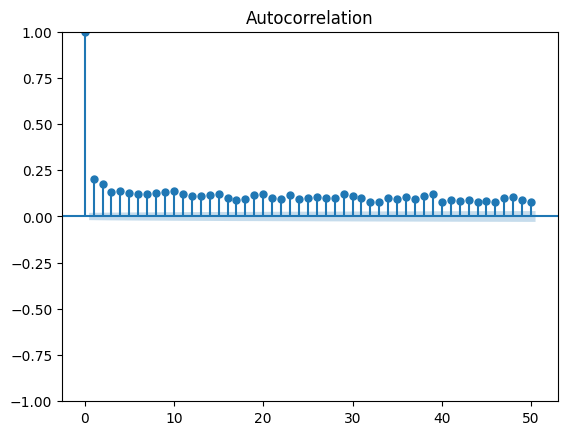

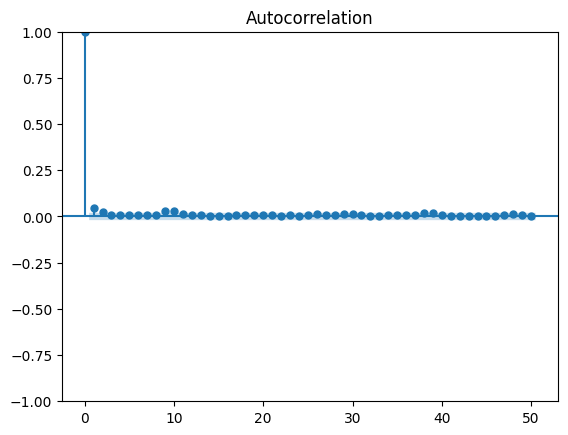

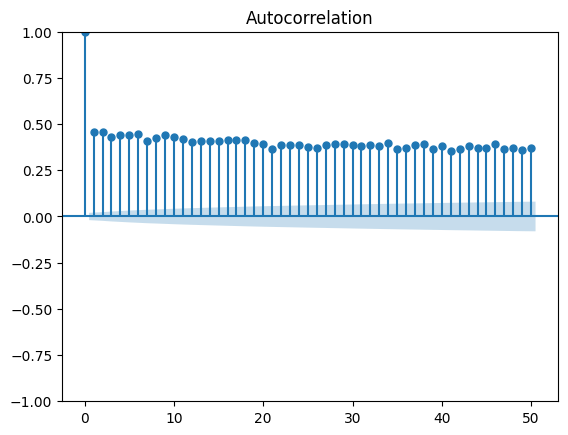

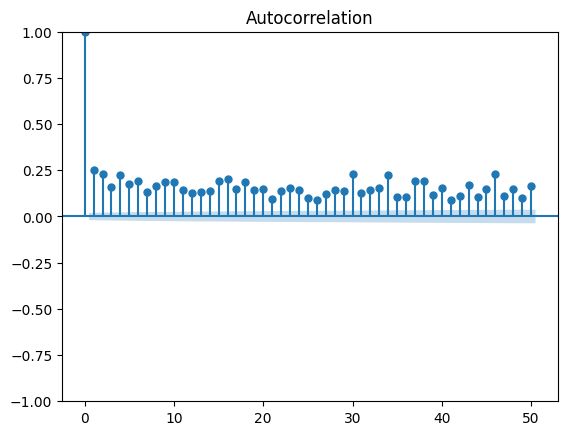

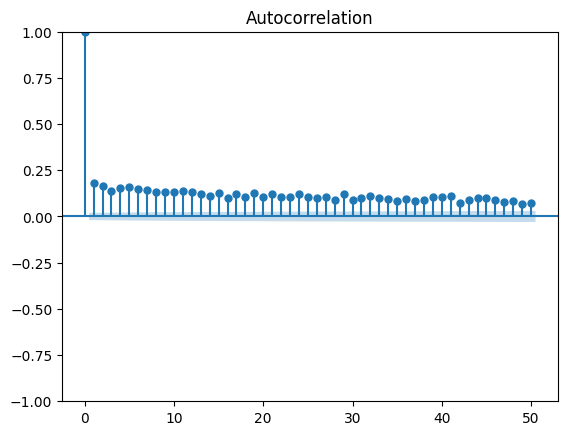

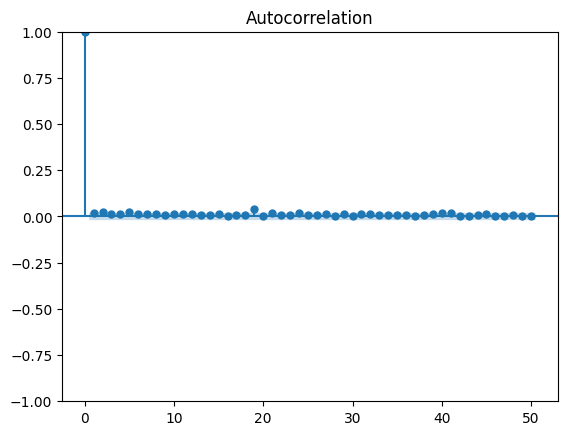

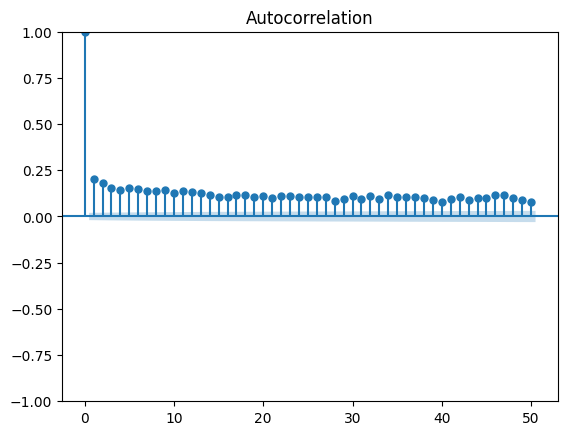

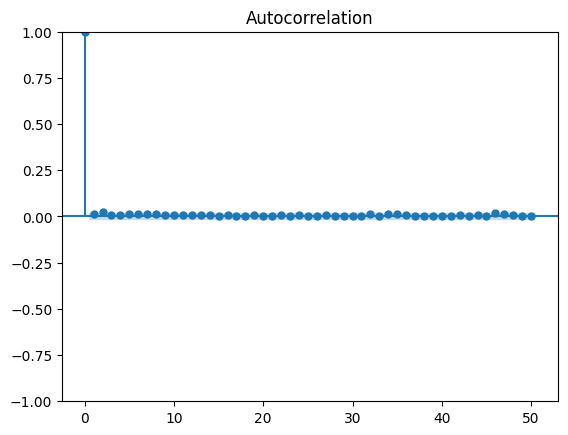

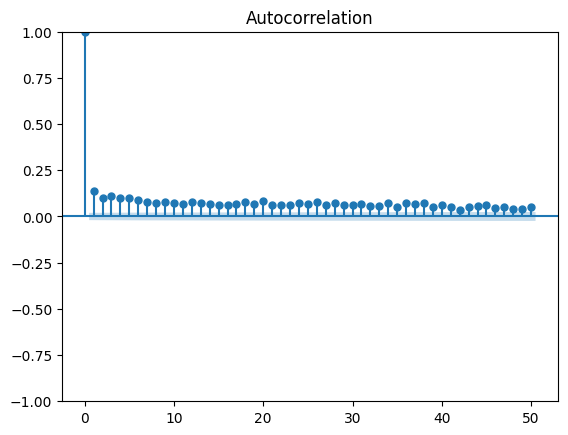

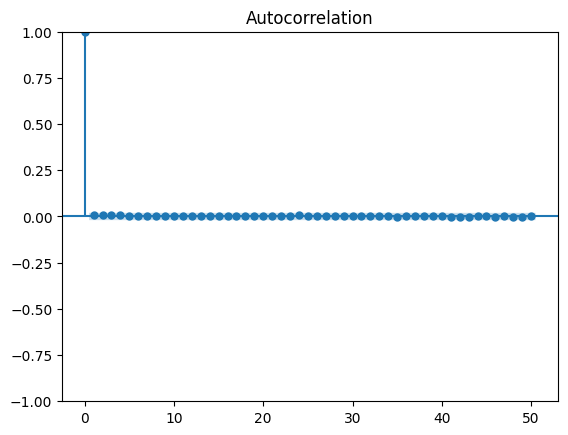

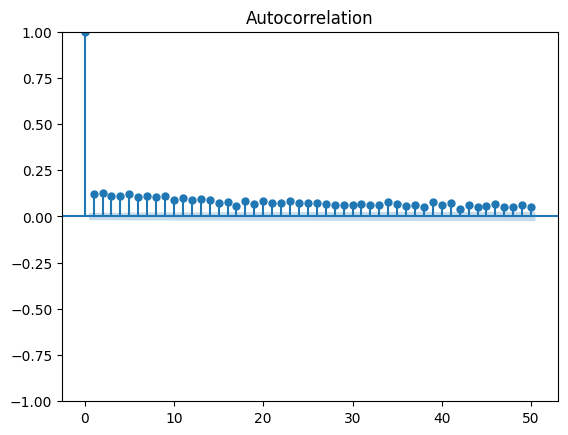

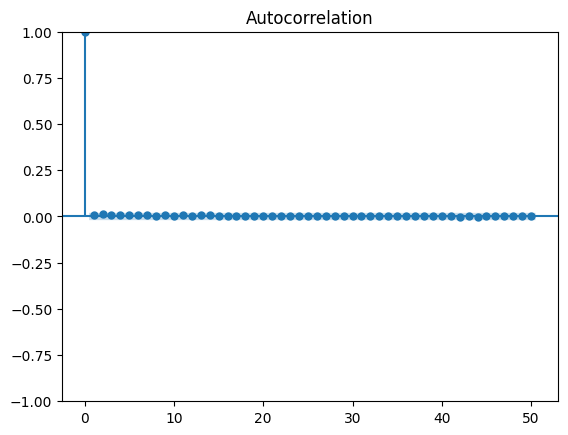

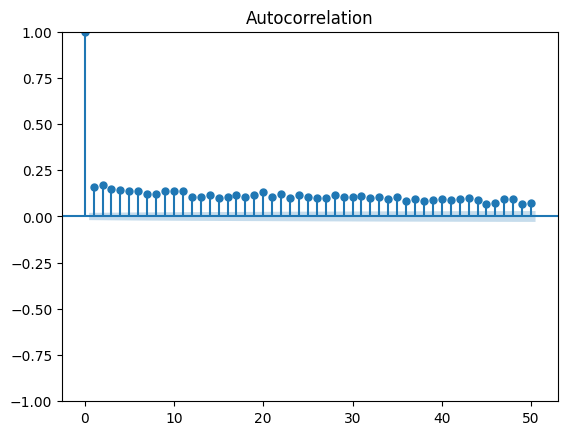

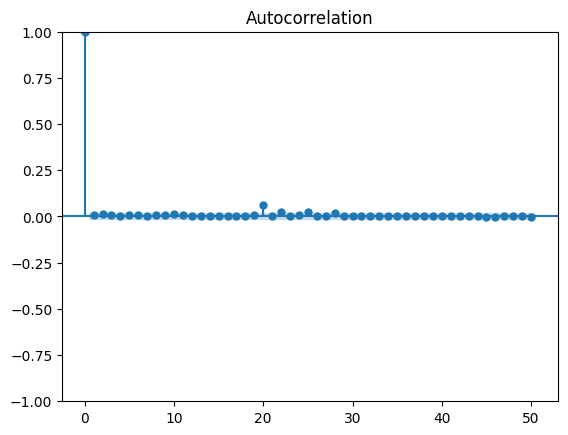

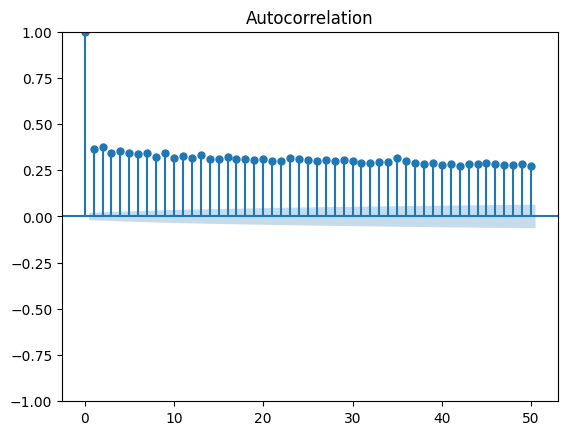

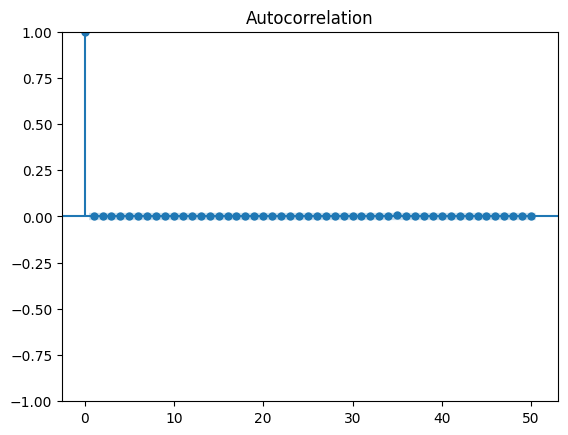

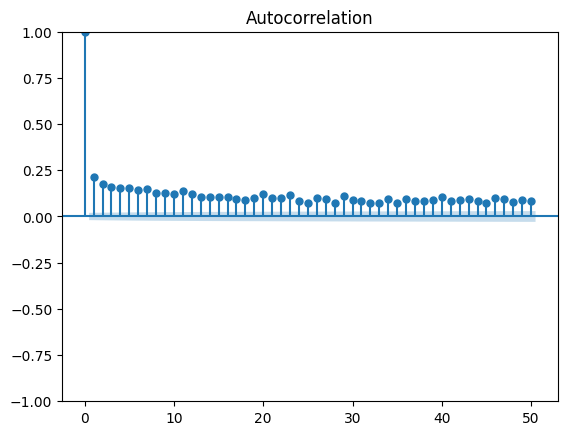

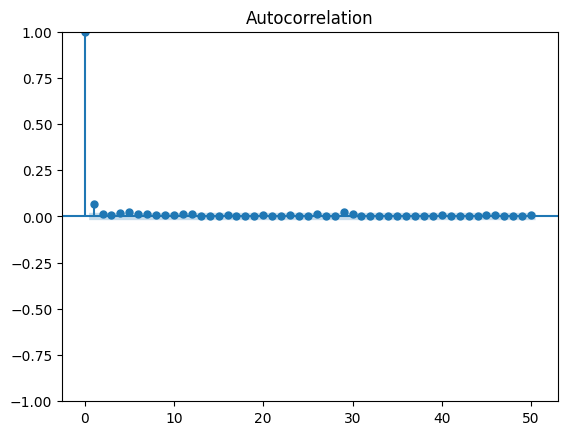

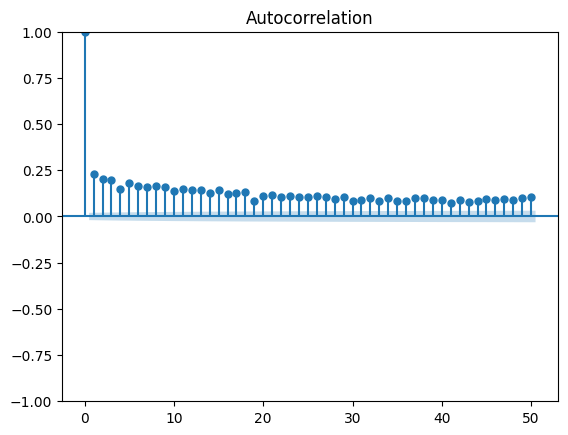

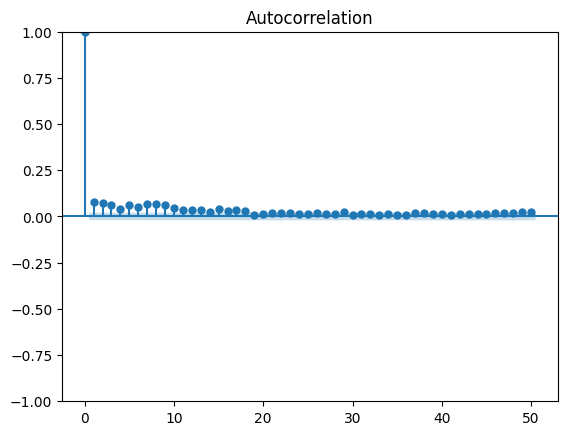

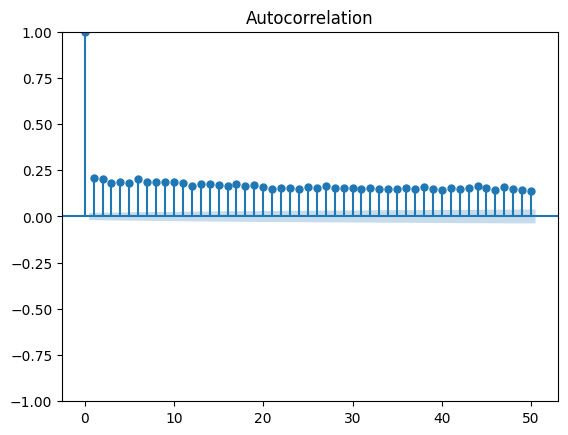

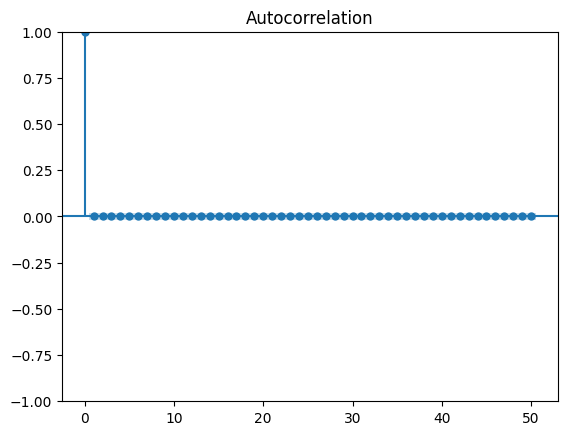

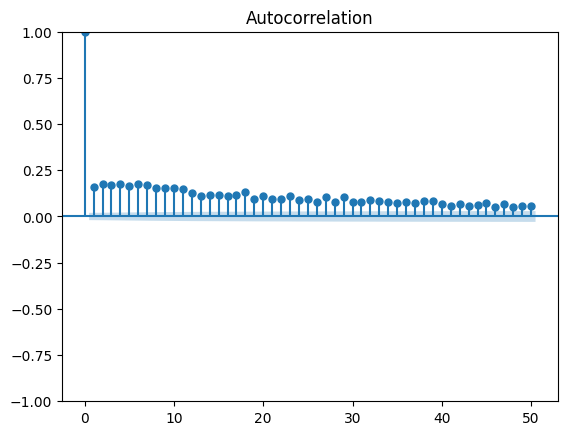

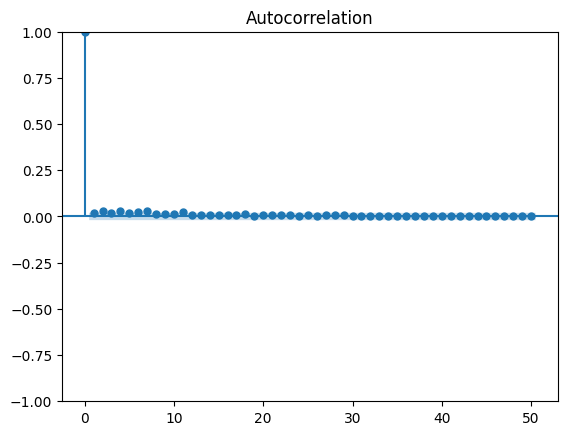

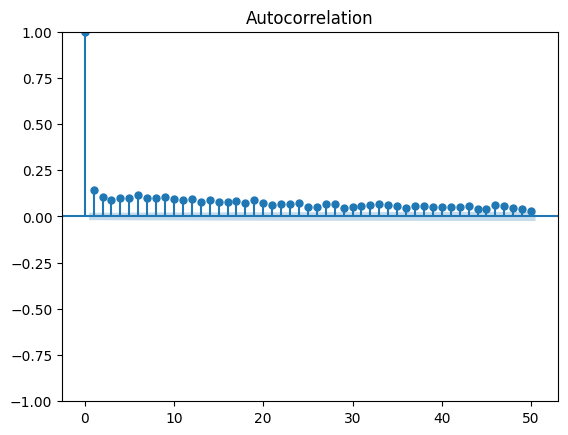

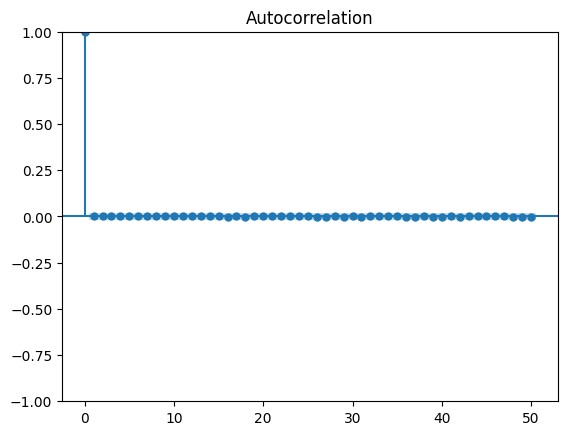

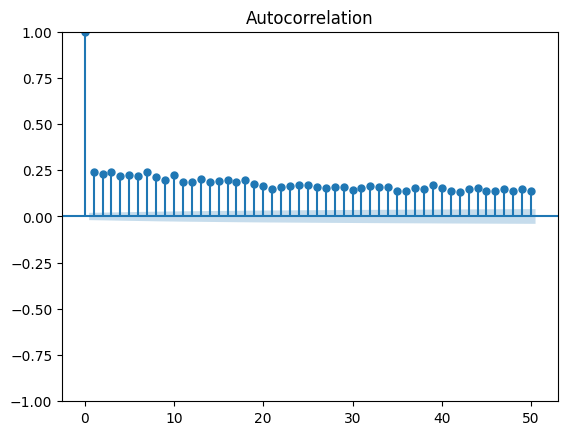

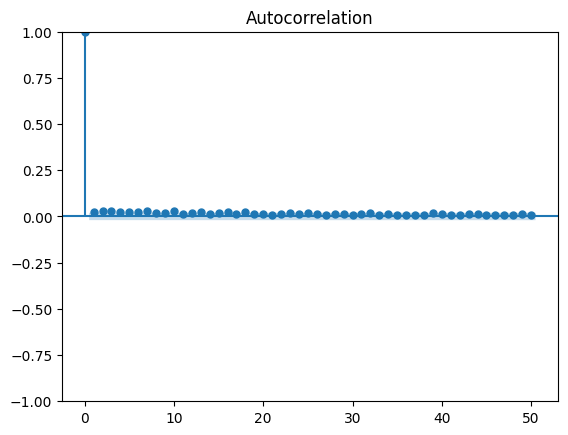

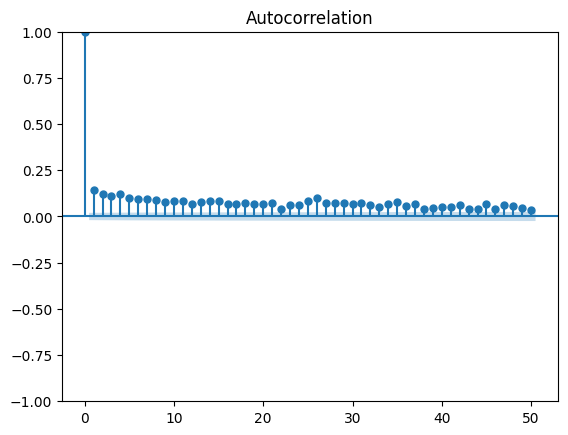

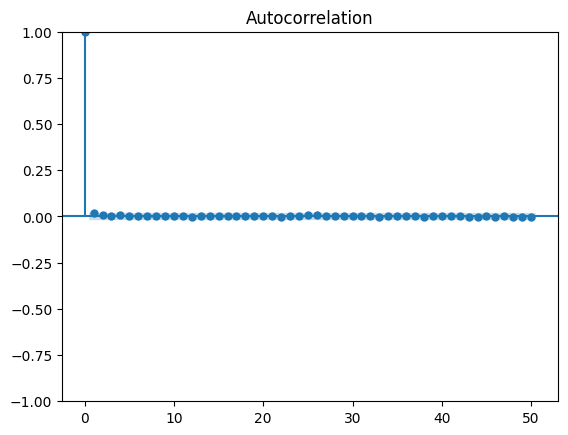

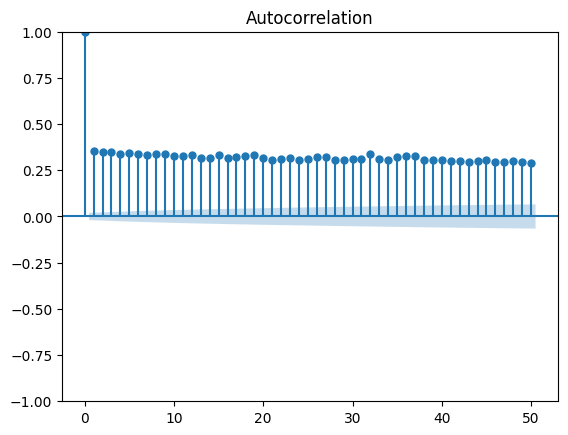

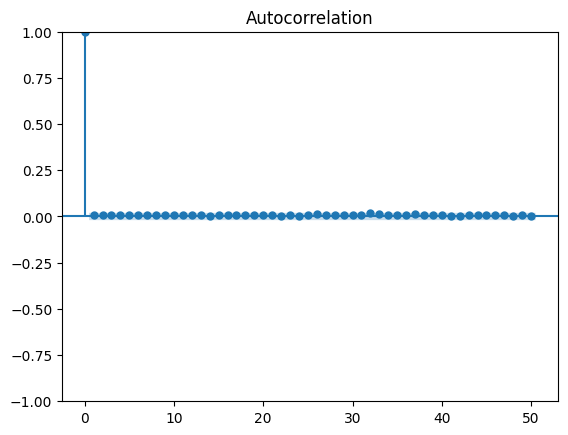

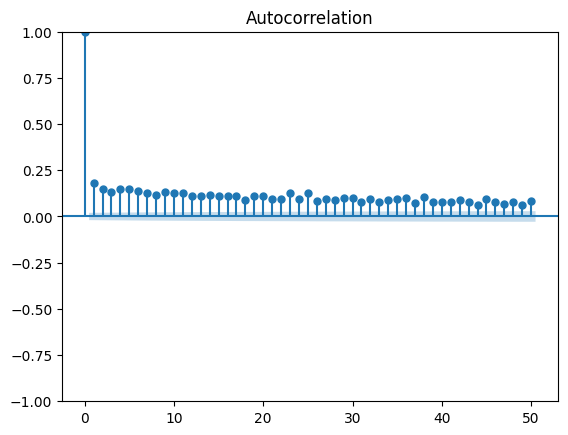

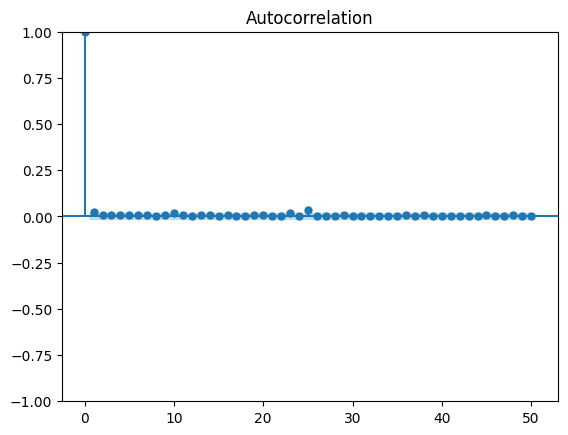

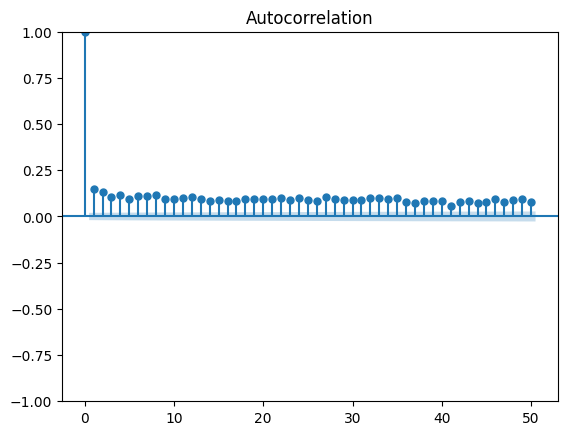

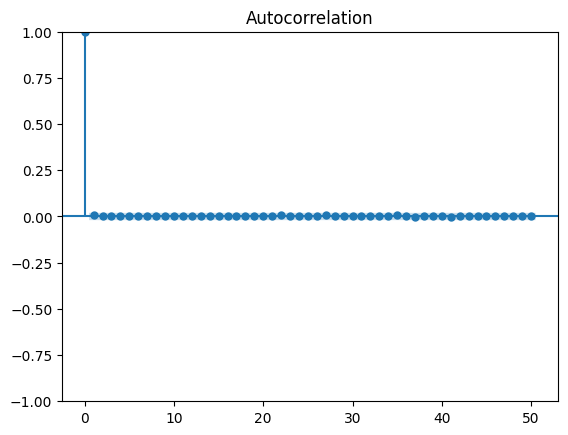

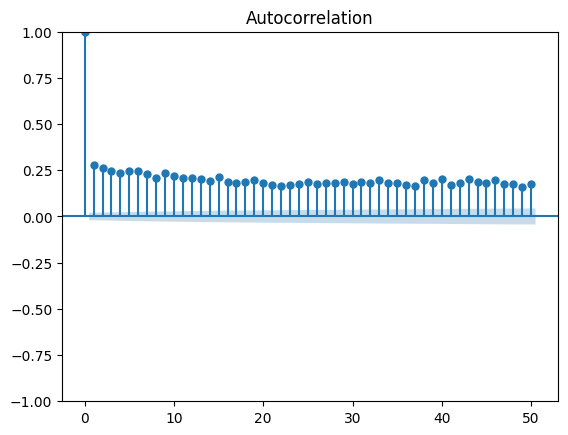

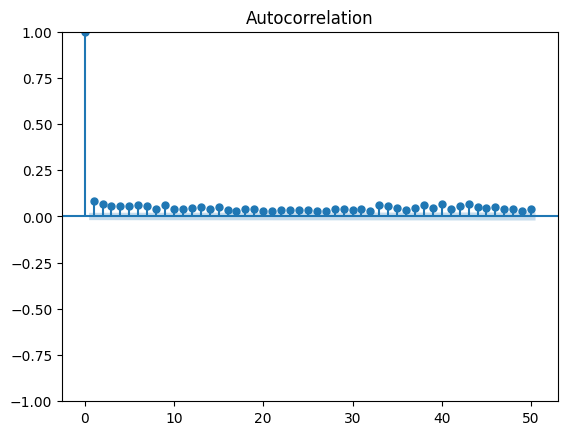

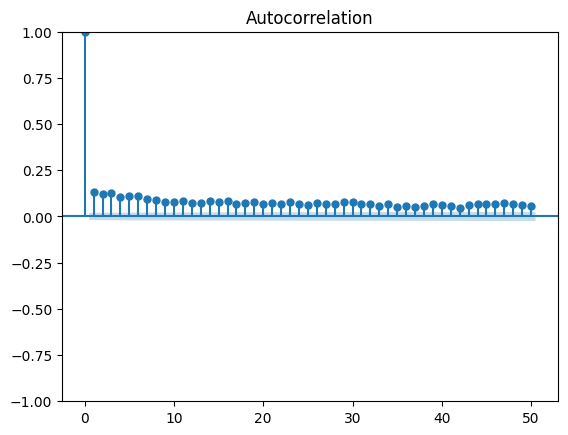

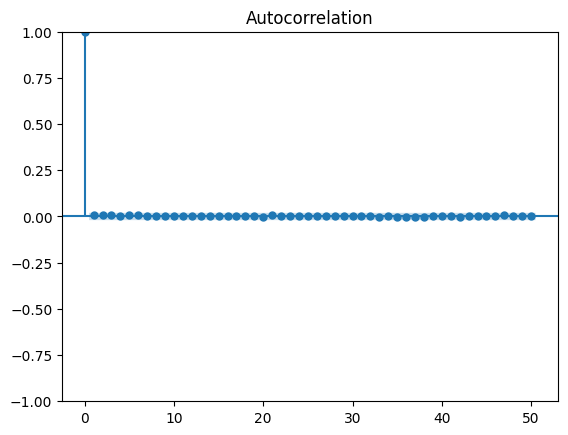

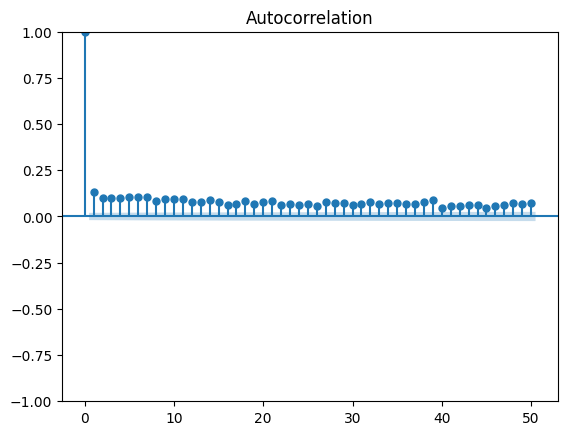

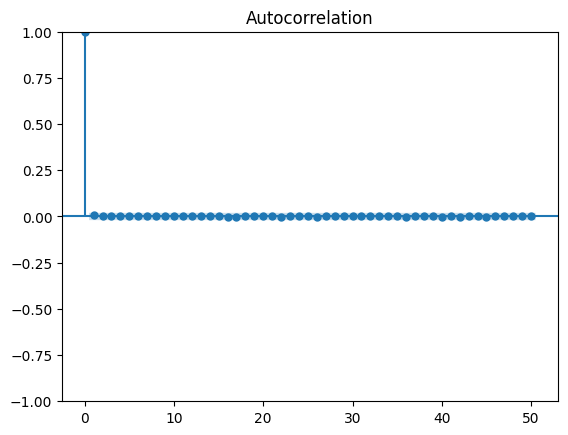

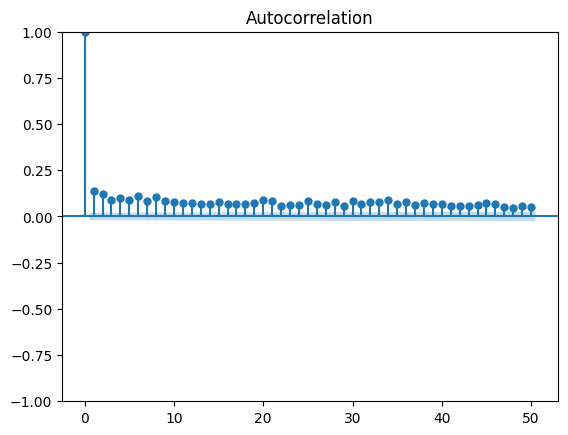

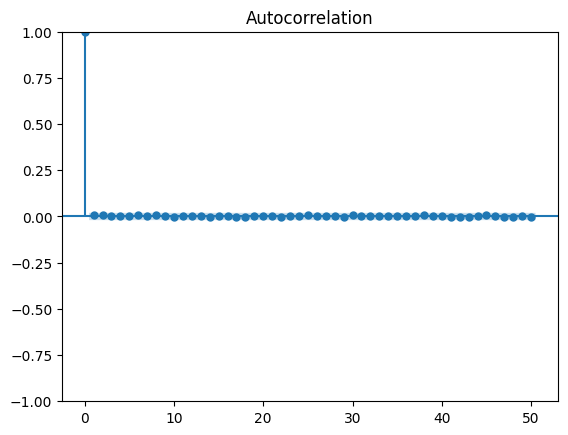

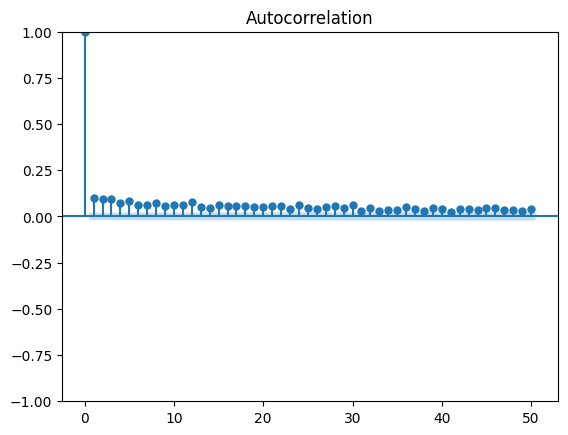

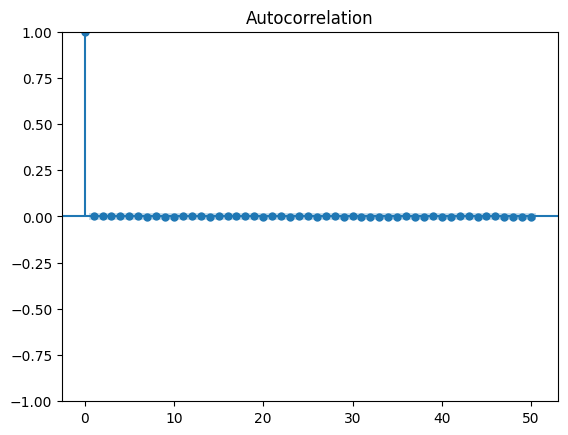

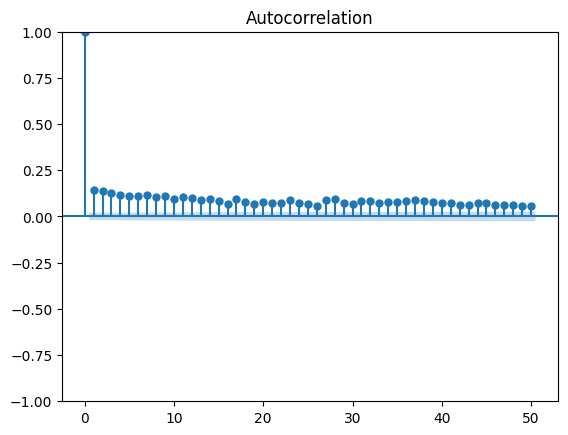

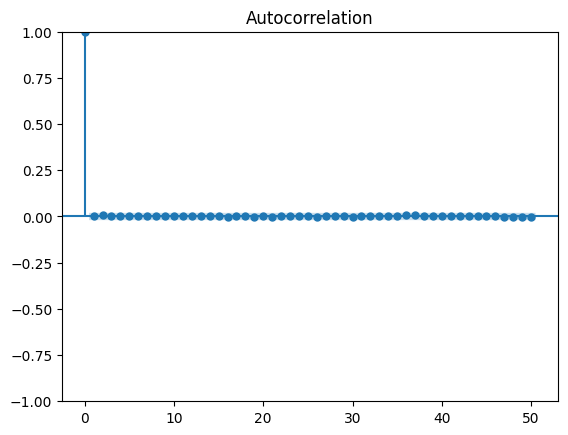

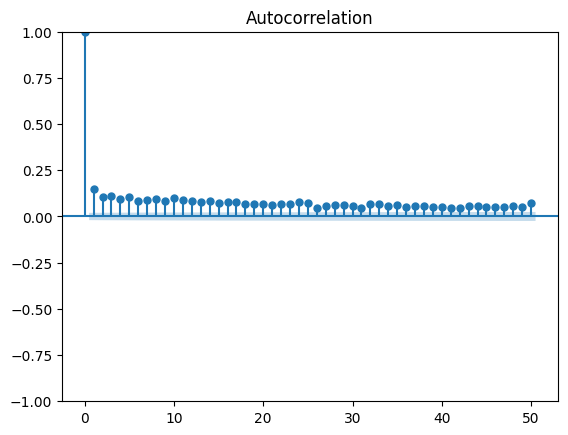

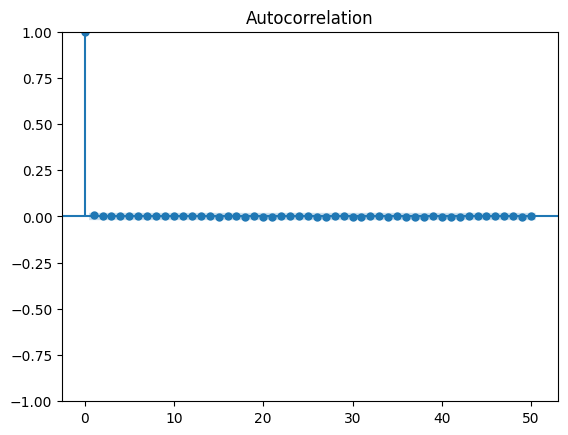

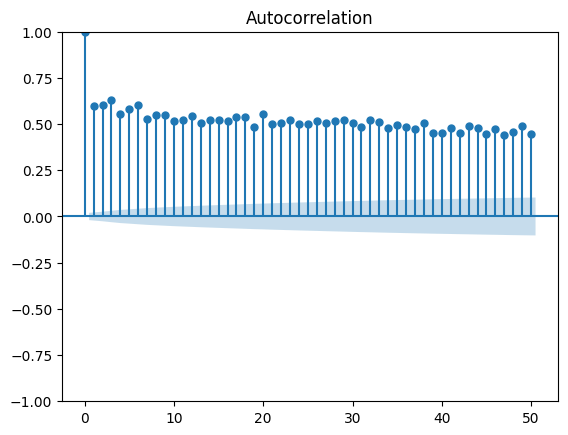

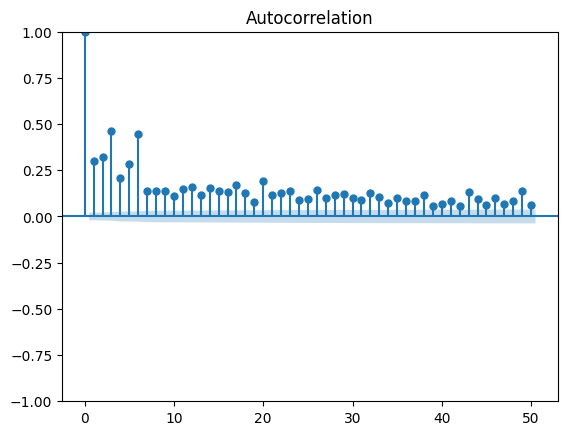

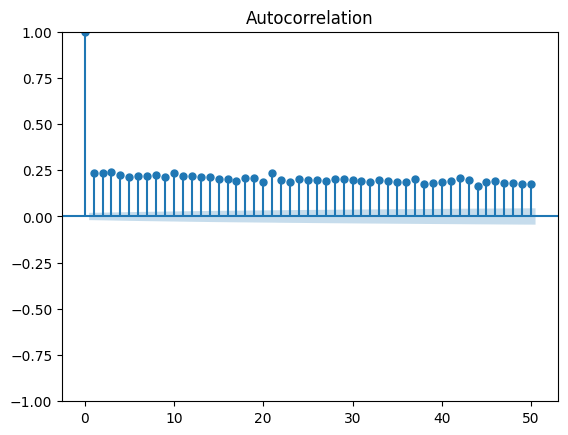

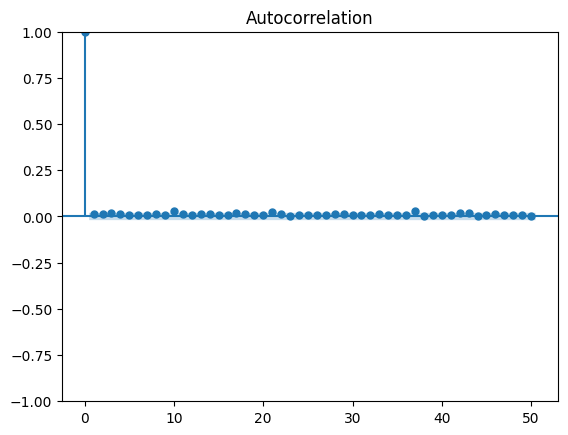

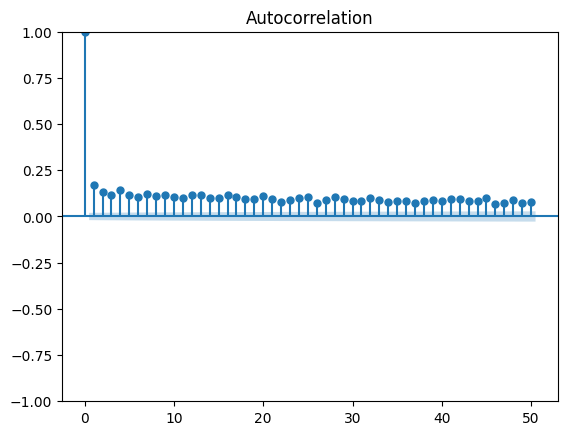

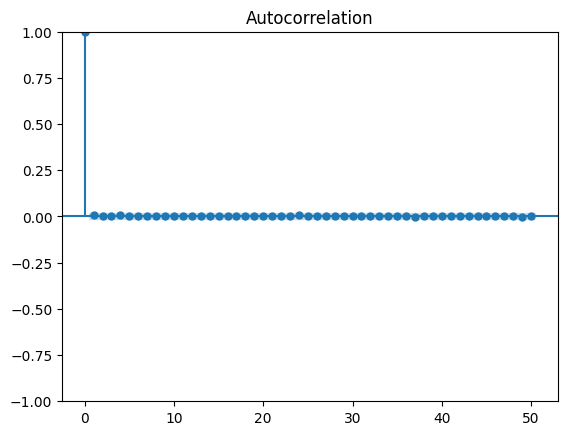

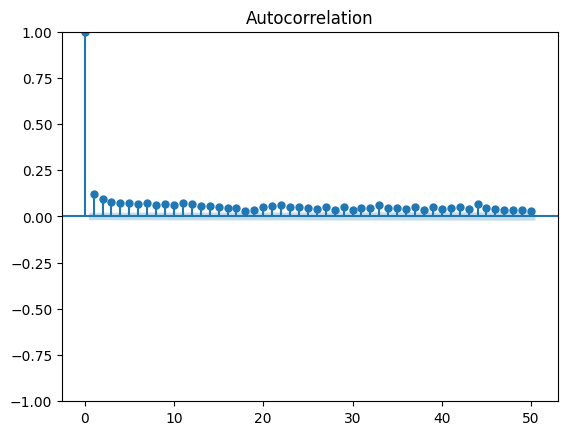

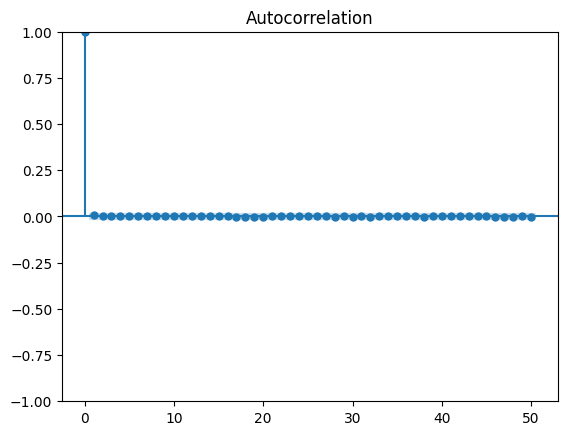

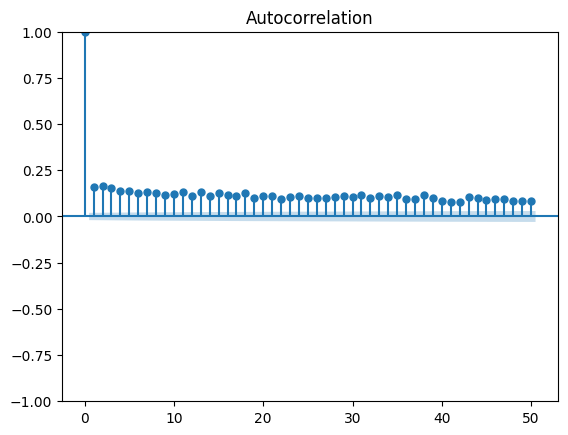

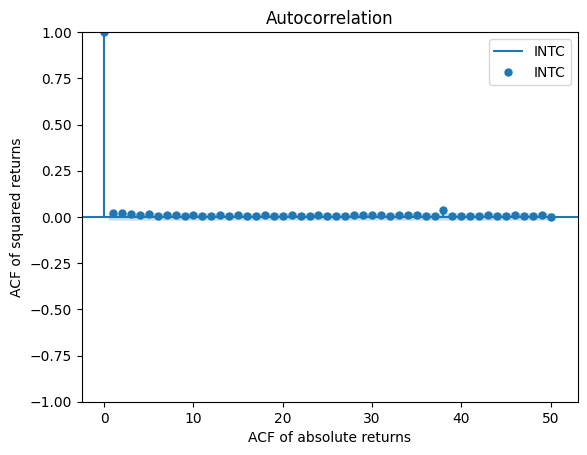

In [ ]:
# Plot the ACF v0.1
lags = 50
acf_abs_returns_per_stock = []
acf_squared_returns_per_stock = []
acf_abs_returns_per_stock_log = []
acf_squared_returns_per_stock_log = []
for stock in returns.columns:
    abs_returns = returns[stock].abs()
    squared_returns = np.square(returns[stock])
    plot_acf(abs_returns, lags = lags, label = stock)
    plot_acf(squared_returns, lags = lags, label = stock)
    acf_abs_returns = acf(abs_returns, nlags = lags)
    acf_squared_returns = acf(squared_returns, nlags = lags)
    acf_abs_returns_log = np.log(acf_abs_returns)
    acf_squared_returns_log = np.log(acf_squared_returns)
    acf_abs_returns_per_stock.append(acf_abs_returns)
    acf_squared_returns_per_stock.append(acf_squared_returns)
    acf_abs_returns_per_stock_log.append(acf_abs_returns_log)
    acf_squared_returns_per_stock_log.append(acf_squared_returns_log)
plt.legend()
plt.ylabel('ACF of squared returns')
plt.xlabel('ACF of absolute returns')
plt.show()

### The next step is to find the powerlaw exponent of the autocorrelation function, you can plot the ACF values on a log log plot and fit a straight line to it. Below we show an example for a single stock:

In [ ]:
def plot_log_acf_vs_fitted_line_to_decay_exponent(y):
    '''This function takes a list of y values and plots the log of the y values against the log of the x values,
     where x is a range of numbers from 1 to the length of y (so y is basically the lags of the ACF) 
     It then fits a line to the data and plots the line on top of the data.
    It also prints the slope of the line, which is the decay exponent of the data.'''
    # convert y to a numpy array
    y = np.array(y)
    length_of_y = len(y)
    y = np.array(y)
    # clean the data, removing nans, infs and 0 values so the log transformation works
    y = y[y != 0]
    y = y[~np.isnan(y)]
    y = y[~np.isinf(y)]
    y = y[y != 0]
    # also taking absolute value of y, incase there are negative correlations, otherwise the log transformation wont work
    y = np.abs(y)

    # log transormation
    y = np.log(y)

    # take a range of x values from 1 to the length of y, this representes the lags
    x = np.arange(1, len(y) + 1)
    x = np.log(x)

    # Reshape the arrays to have a single column
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)

    # plot ACF function on a log log scatter plot

    fig, ax = plt.subplots()
    ax.set_xticks(np.arange(0, 8))
    ax.set_yticks(np.arange(-10, 2))
    ax.set_xlim([0, 8])
    ax.set_ylim([-10, 2])
    ax.scatter(x, y, alpha=0.2)
    # Train the linear regression model
    model = LinearRegression()
    model.fit(x, y)

    x_input = np.arange(0, 8).reshape(-1, 1)
    # Plot the data vs the model prediction
    y_fitted = model.predict(x_input)
    ax.set_title('Line Fitted to Decay of ACF')
    ax.set_xlabel('log(lag)')
    ax.set_ylabel('log(ACF)')

    ax.plot(x_input, y_fitted, color='red')
    print('The powerlaw exponent of the decay of the ACF of is around: ' + str(model.coef_[0][0]))


The powerlaw exponent of the decay of the ACF of is around: -0.33524425704740846


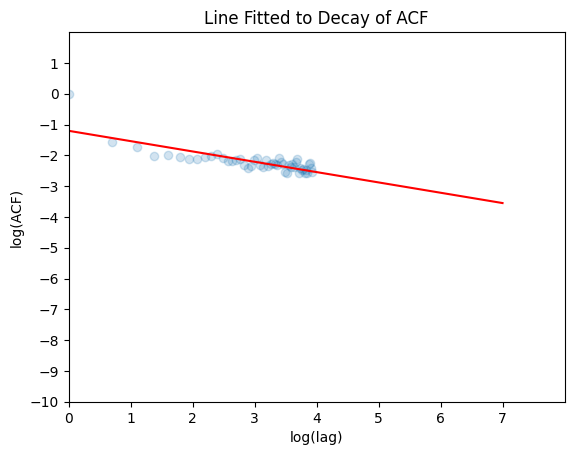

In [ ]:
plot_log_acf_vs_fitted_line_to_decay_exponent(acf_abs_returns_per_stock[0])

Using the same logic we create the function below:

In [ ]:
def return_powerlaw_exponent_of_ACF_series(y):
    ''' Returns the powerlaw decay exponent of a given ACF series'''
    # convert to numpy array
    y = np.array(y)
    # Remove NaN, Inf and 0 values to avoid errors on log
    y = y[y != 0]
    y = y[~np.isnan(y)]
    y = y[~np.isinf(y)]
    y = np.abs(y)
    y = np.log(y)
    # Create the logarithmic x-values
    x = np.arange(1, len(y) + 1)
    x = np.log(x)

    # Reshape the arrays to have a single column
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)

    # Train the linear regression model
    model = LinearRegression()
    model.fit(x, y)

    # Return the slope of the regression line
    return model.coef_[0][0]

In [ ]:
# Testing the function, we can see the coefficient is indeed the same
return_powerlaw_exponent_of_ACF_series(acf_abs_returns_per_stock[0])

-0.33524425704740846

### Next, using this code, we reproduce figure 3 of Feng et al.'s paper

We do this see if the mathematical scaling relations derived in appendix 2 of the paper hold on this dataset. The reason we do this, is because if these relationships hold, this is evidence that our stochastic model should have the potential for a decent fit in principle

In [ ]:
acf_abs_returns_per_stock

[array([1.        , 0.20548128, 0.17552096, 0.13184765, 0.13585294,
        0.12646164, 0.12198827, 0.12072551, 0.12727004, 0.13053678,
        0.13957591, 0.12320549, 0.1118762 , 0.11297099, 0.11490571,
        0.11992926, 0.0999166 , 0.089409  , 0.0953469 , 0.11484241,
        0.12326181, 0.0984446 , 0.09219866, 0.11609979, 0.09438465,
        0.10095873, 0.10621507, 0.1015981 , 0.09943677, 0.12382013,
        0.10898057, 0.10200599, 0.07886096, 0.07634544, 0.09937734,
        0.09411406, 0.10306157, 0.09372379, 0.11049557, 0.12038116,
        0.07606712, 0.09003865, 0.08516884, 0.08667091, 0.07606844,
        0.08467243, 0.07631649, 0.10190816, 0.1040345 , 0.09019019,
        0.07856887]),
 array([1.        , 0.45967492, 0.45970179, 0.43060675, 0.44275911,
        0.44256947, 0.44724867, 0.4062289 , 0.42560771, 0.43840664,
        0.4308107 , 0.41738465, 0.40511439, 0.40596922, 0.40973515,
        0.40752767, 0.41164853, 0.4133023 , 0.41160479, 0.39829436,
        0.39309825, 0.3667

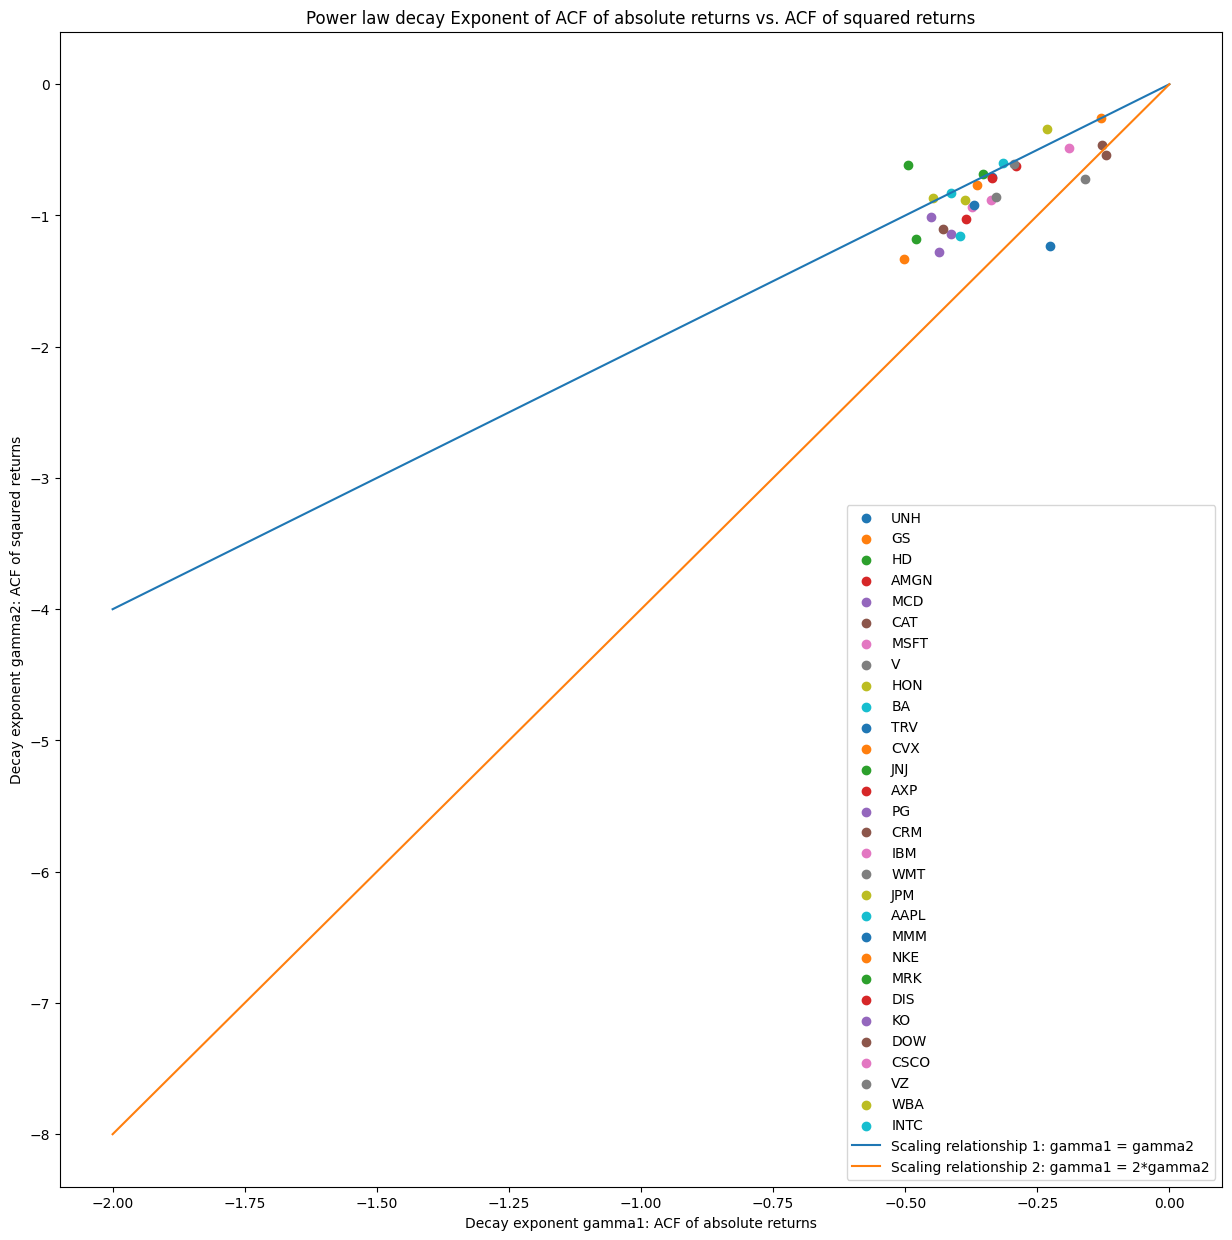

In [ ]:
plt.figure(figsize=(15,15))
for index in range(len(acf_abs_returns_per_stock)):
    exponent_acf_abs_returns = return_powerlaw_exponent_of_ACF_series(acf_abs_returns_per_stock[index])
    exponent_acf_squared_returns = return_powerlaw_exponent_of_ACF_series(acf_squared_returns_per_stock[index])
    plt.scatter(exponent_acf_abs_returns,exponent_acf_squared_returns, label = returns.columns[index])
    # scaling relationhip 1: gamma1 = gamma2
    gamma1 = np.linspace(-2, 0, 100)
    gamma2 = gamma1
    # scaling relationhip 2: gamma1 = 2*gamma2
    gamma1 = np.linspace(-2, 0, 100)
    gamma2 = gamma1*2
plt.plot(gamma1, gamma2, label = 'Scaling relationship 1: gamma1 = gamma2')
plt.plot(gamma1, 2*gamma2, label = 'Scaling relationship 2: gamma1 = 2*gamma2')
plt.legend()
plt.xlabel('Decay exponent gamma1: ACF of absolute returns')
plt.ylabel('Decay exponent gamma2: ACF of sqaured returns')
plt.title('Power law decay Exponent of ACF of absolute returns vs. ACF of squared returns')
plt.show()

Feng et al's (2012) found scaling relationships (derived in appendix 3 of the paper) between power law decay exponents largely hold on a current dataset with DOW jones stocks, with the excpetion being stocks with the ticker symbols TRV, CAT, HD and HON, V and DOW.


 Next we show a zoomed in version with more detail: 

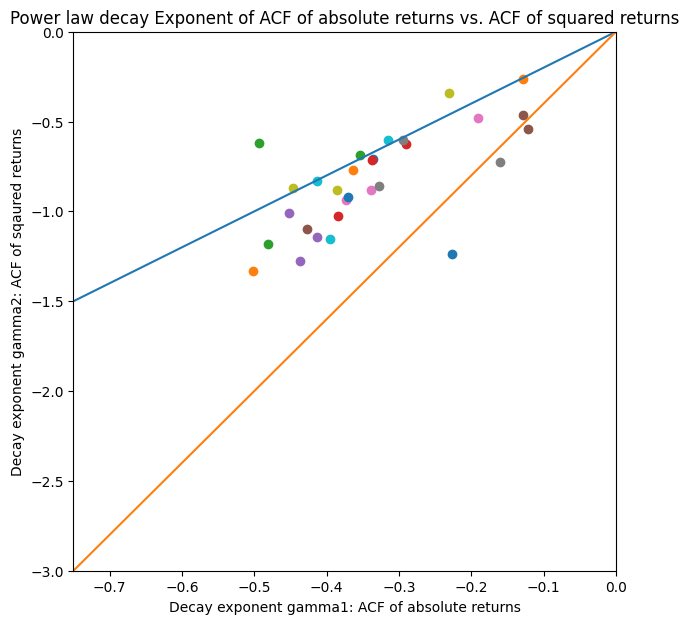

In [ ]:
plt.figure(figsize=(7,7))
for index in range(len(acf_abs_returns_per_stock)):
    exponent_acf_abs_returns = return_powerlaw_exponent_of_ACF_series(acf_abs_returns_per_stock[index])
    exponent_acf_squared_returns = return_powerlaw_exponent_of_ACF_series(acf_squared_returns_per_stock[index])
    plt.scatter(exponent_acf_abs_returns,exponent_acf_squared_returns, label = returns.columns[index])
    # scaling relationhip 1: gamma1 = gamma2
    gamma1 = np.linspace(-1, 0, 100)
    # scaling relationhip 2: gamma1 = 2*gamma2
    gamma2 = gamma1*2
plt.xlim(-0.75, 0)
plt.ylim(-3, 0)
plt.plot(gamma1, gamma2, label = 'Scaling relationship 1: gamma1 = gamma2')
plt.plot(gamma1, 2*gamma2, label = 'Scaling relationship 1: gamma1 = 2*gamma2')
plt.xlabel('Decay exponent gamma1: ACF of absolute returns')
plt.ylabel('Decay exponent gamma2: ACF of sqaured returns')
plt.title('Power law decay Exponent of ACF of absolute returns vs. ACF of squared returns')
plt.show()

# Comparing S&P 500 total index closing ACF 

### Next, we move on to reproducing figure 4 of Feng et al.'s paper.

Since the complete 40 year data of S&P index closing prices was not found during the timeframe (only for all stocks, but not for the index we take the last 10 years. The goal is to find out if the long term memory (ACF decay) is similair in both the emperical and simulated model data.

In [ ]:
# we also code a normalization function to normalize the runs:

def normalise(returns):
    """
    Normalises an array
    """
    array = np.array(returns)
    return np.abs((array - array.mean())/array.std())

In [ ]:
# The source of this data is the nasdaq website: https://www.nasdaq.com/market-activity/index/spx/historical

total_SnP500_index_closing =pd.read_csv('data/df_total_SnP500_closing_10_years_clean.csv', parse_dates = True, index_col = 'Date')



In [ ]:
total_SnP500_index_closing

,Close/Last
Date,
2023-01-27,4070.56
2023-01-26,4060.43
2023-01-25,4016.22
2023-01-24,4016.95
2023-01-23,4019.81
...,...
2013-02-05,1511.29
2013-02-04,1495.71
2013-02-01,1513.17


In [ ]:
# make a log return series
returns = total_SnP500_index_closing.apply(normalise).apply(np.log).diff().dropna()

In [ ]:
# absolute returns
abs_returns = returns.abs().values.flatten()
# squared returns
squared_returns = returns.apply(np.square).values.flatten()


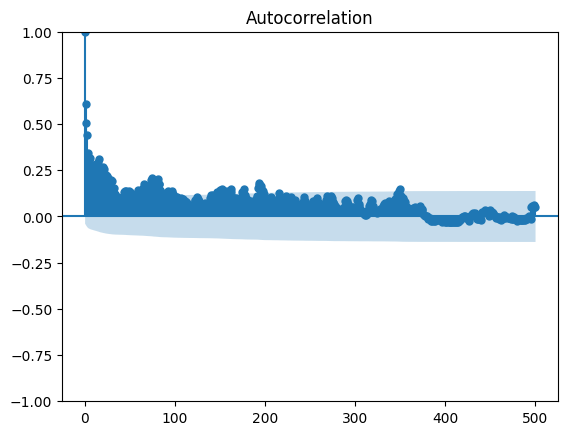

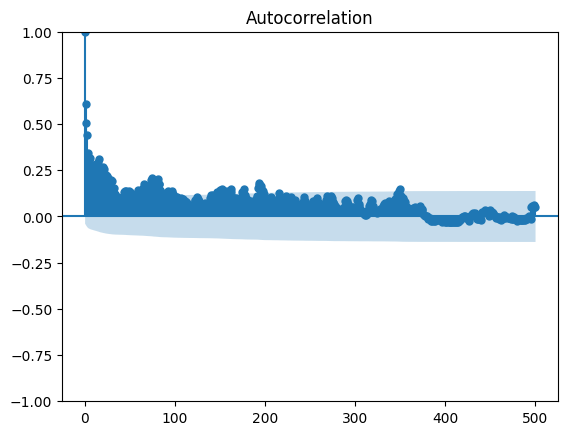

In [ ]:
plot_acf(abs_returns, lags = 500)

The powerlaw exponent of the decay of the ACF of is around: -0.5284483944299946


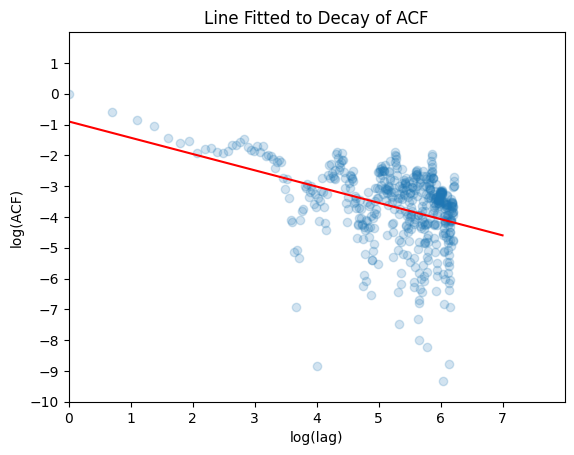

In [ ]:
plot_log_acf_vs_fitted_line_to_decay_exponent(acf(normalise(abs_returns), nlags = 500))

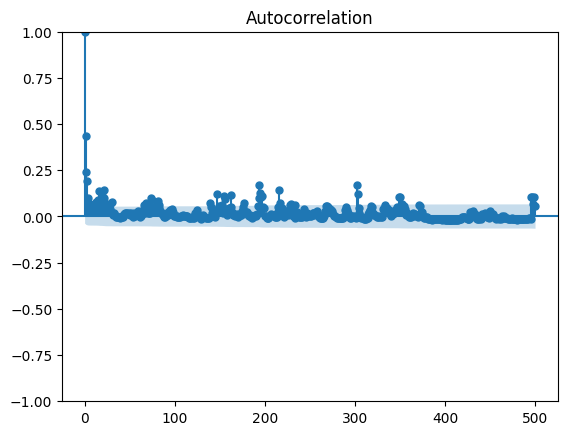

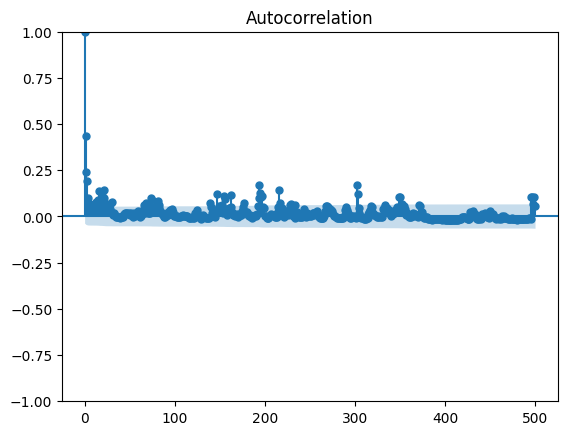

In [ ]:
plot_acf(squared_returns, lags = 500)

In [ ]:
plot_log_acf_vs_fitted_line_to_decay_exponent

<function __main__.plot_log_acf_vs_fitted_line_to_decay_exponent(y)>

The powerlaw exponent of the decay of the ACF of is around: -0.8724351491584189


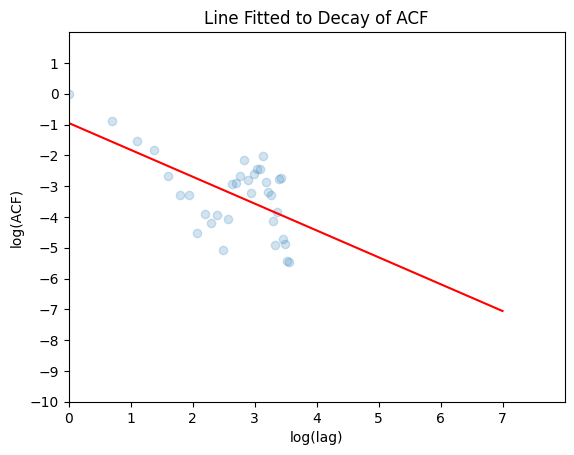

In [ ]:
plot_log_acf_vs_fitted_line_to_decay_exponent(acf(normalise(squared_returns)))

We can see the emperical S&P 500 10 year ACF figures look different from Fengs paper, but we can see noteworthy autocorrelation existing in the left of the plots, just like fengs paper.

Now we compare against this autocorrelation to the ACF of the simulated data from the stochastic model with and without horizons

In [ ]:
# Recall the datastructure of the stochastic model result object.
# It is a list of 4 lists (one for each V_f setting), of 10 lists (one for each run), '
# with each run being a numpy array of 1000001 timesteps
# we choose V_f = 0.4, which corresponds to the 1st item of the outer list of the stochastic model result object
# we choose the 1st run, which corresponds to the 0st item of the inner list of the stochastic model result object
print(len(stochastic_model_without_time_horizon_results))
print(len(stochastic_model_without_time_horizon_results[1]))
print(len(stochastic_model_without_time_horizon_results[1][0]))

4
10
1000001


### Comparing ACF of abs returns with stochastic model without time horizons (1 run)

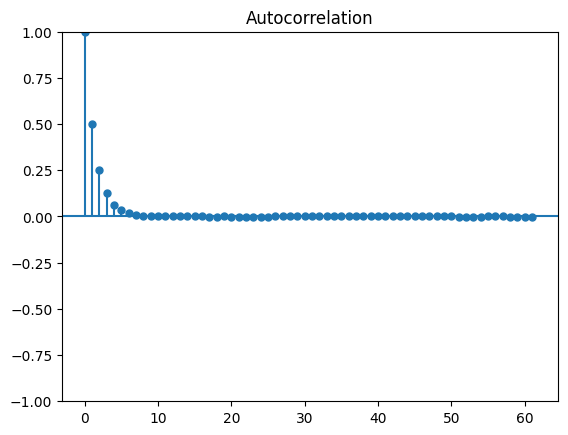

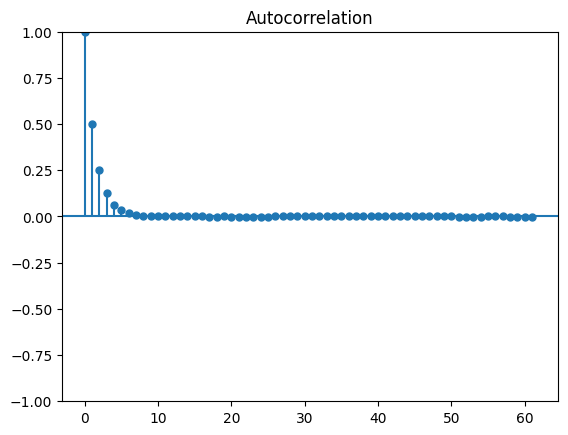

In [ ]:
plot_acf(np.abs(normalise(stochastic_model_without_time_horizon_results[1][0])))

We can see that, for this run, the ACF of the absolute returns of the stochastic model without horozons for this model shows a similair autocorrelation on the left side plot as the SnP index

Showing the decay exponent of this ACF plot, with emperical V_f setting 0.4. This corresponds to the proportion of fundamental traders V_f, which we (as a simplifying assumption) assume to not have changes since the period of the paper.

The powerlaw exponent of the decay of the ACF of is around: -1.6487132831422848


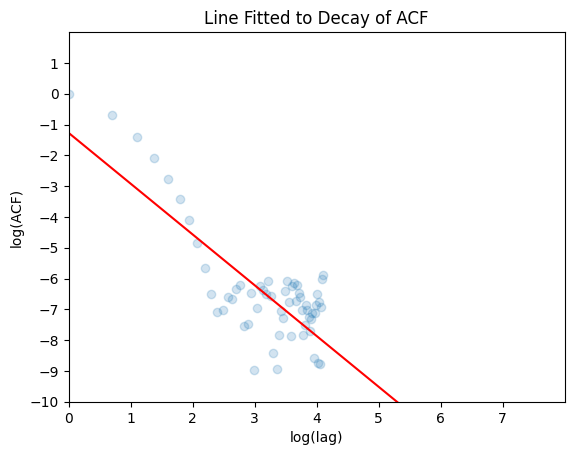

In [ ]:
# we get the exponent of the absolute returns
plot_log_acf_vs_fitted_line_to_decay_exponent(acf(np.abs(normalise(stochastic_model_without_time_horizon_results[1][0]))))

### Comparing ACF of squared returns with stochastic model without time horizons (1 run)

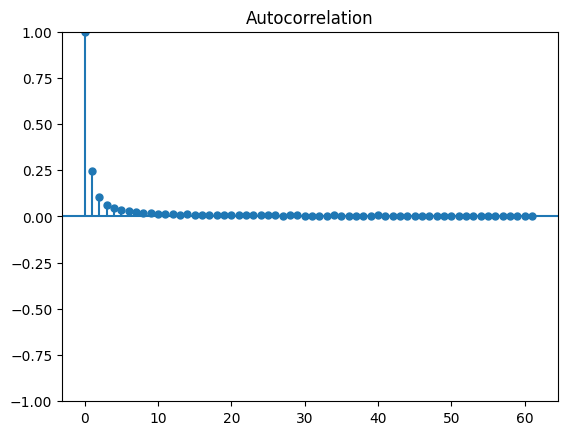

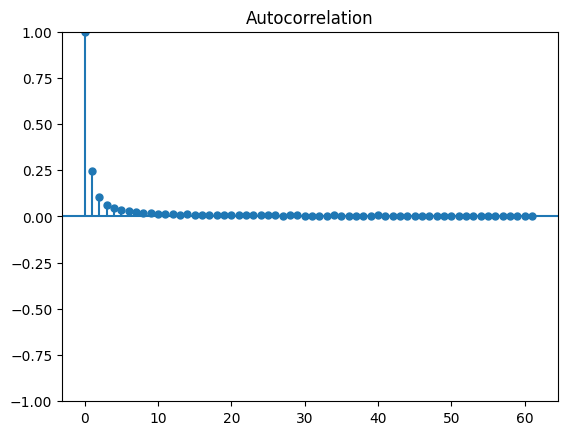

In [ ]:
plot_acf(np.square(stochastic_model_with_time_horizon_results[1][0]))

We can see that, for this run, the ACF of the squared returns of the stochastic model with horozons for this model shows a similair autocorrelation on the left side plot as the SnP index

The powerlaw exponent of the decay of the ACF of is around: -1.4836012908917735


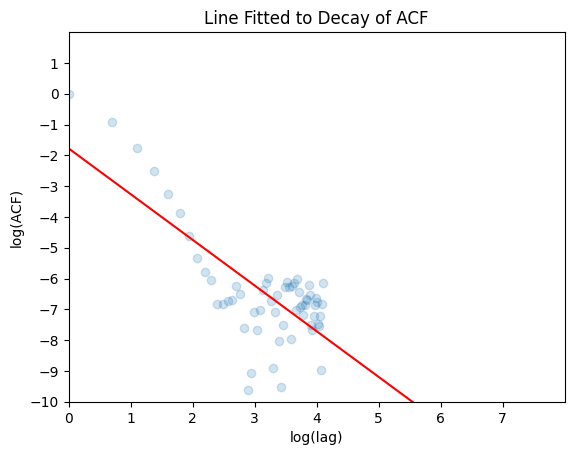

In [ ]:
# we get the exponent of the squared returns
plot_log_acf_vs_fitted_line_to_decay_exponent(acf(np.square(normalise(stochastic_model_without_time_horizon_results[1][0]))))

### Comparing ACF of abs returns with stochastic model with time horizons (1 run)

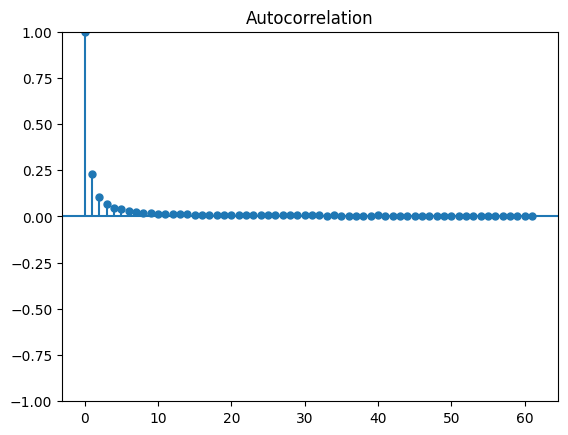

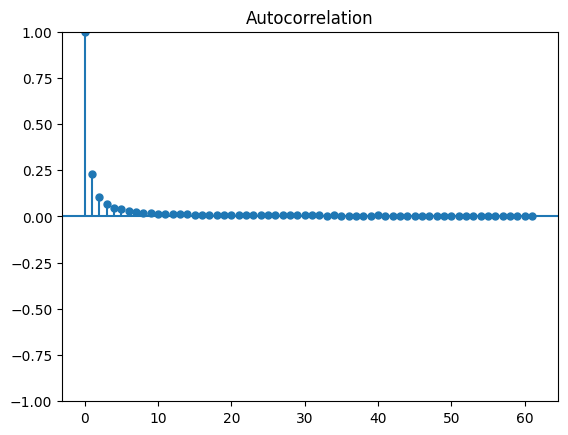

In [ ]:
plot_acf(np.abs(normalise(stochastic_model_with_time_horizon_results[1][0])))

We can see that, for this run, the ACF of the absolute returns of the stochastic model without horozons for this model shows a similair autocorrelation on the left side plot as the SnP index

Showing the decay exponent of this ACF plot, with emperical V_f setting 0.4. This corresponds to the proportion of fundamental traders V_f, which we (as a simplifying assumption) assume to not have changes since the period of the paper.

The powerlaw exponent of the decay of the ACF of is around: -1.5211156770076972


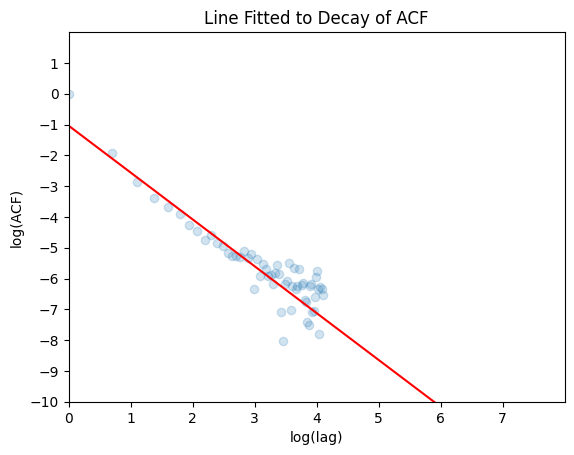

In [ ]:
# we get the exponent of the absolute returns
plot_log_acf_vs_fitted_line_to_decay_exponent(acf(normalise(np.abs(stochastic_model_with_time_horizon_results[1][0]))))

### Simulated power law ACF exponents aggregation across mutiple runs & comparison vs. emperical

In this section we aggregate the power law exponent fitting across mutiple runs, for both the stochastic model with and without horizons. After we make a conclusion comparing results to Feng et al's 2012 paper. We will not plot ACF's for all runs, in order to reduce bloat and we will just focus on the exponents of the ACF decay functions here.

Comparing the fit on abs returns (no time horizon, i.e. no memory)

In [ ]:
print('Stochastic model without time horizon, absolute returns, V_f = 0.4')
average_powerlaw_exponent_of_ACF_series_of_abs_returns_of_stochastic_without_horizons = []
for run in range(10):
    abs_exponent = return_powerlaw_exponent_of_ACF_series(acf(np.abs(normalise(stochastic_model_without_time_horizon_results[1][run])),500))
    print('exponent run '+ str(run+1) + ': ' + str(abs_exponent))
    average_powerlaw_exponent_of_ACF_series_of_abs_returns_of_stochastic_without_horizons.append(abs_exponent)
print('average exponent', np.mean(average_powerlaw_exponent_of_ACF_series_of_abs_returns_of_stochastic_without_horizons))
print('min exponent', np.min(average_powerlaw_exponent_of_ACF_series_of_abs_returns_of_stochastic_without_horizons))
print('max exponent', np.max(average_powerlaw_exponent_of_ACF_series_of_abs_returns_of_stochastic_without_horizons))
SnP500_abs_returns_exponent = (return_powerlaw_exponent_of_ACF_series(acf(abs_returns,nlags = 500)))
print('S&P500 exponent: ', SnP500_abs_returns_exponent)
difference_no_time_horizon_abs_returns = np.mean(average_powerlaw_exponent_of_ACF_series_of_abs_returns_of_stochastic_without_horizons) - SnP500_abs_returns_exponent
print('difference between average exponent and S&P500 exponent:', difference_no_time_horizon_abs_returns)



Stochastic model without time horizon, absolute returns, V_f = 0.4
exponent run 1: -1.6486954715803126
exponent run 2: -1.6099647415534195
exponent run 3: -1.4445849801167463
exponent run 4: -1.7247042166307394
exponent run 5: -1.5629161471154127
exponent run 6: -1.5842945291711035
exponent run 7: -1.6342454090258762
exponent run 8: -1.5438697280880165
exponent run 9: -1.6660254001890287
exponent run 10: -1.7483190439906342
average exponent -1.6167619667461288
min exponent -1.7483190439906342
max exponent -1.4445849801167463
S&P500 exponent:  -0.8201263813788142
difference between average exponent and S&P500 exponent: -0.7966355853673146


Comparing the fit on squared returns (no time horizon, i.e. no memory)

In [ ]:
print('Stochastic model without time horizon, squared returns, V_f = 0.4')
average_powerlaw_exponent_of_ACF_series_of_squared_returns_of_stochastic_without_horizons = []
for run in range(10):
    squared_exponent = return_powerlaw_exponent_of_ACF_series(acf(np.square(normalise(stochastic_model_without_time_horizon_results[1][run])),500))
    print('exponent run '+ str(run+1) + ': ' + str(squared_exponent))
    average_powerlaw_exponent_of_ACF_series_of_squared_returns_of_stochastic_without_horizons.append(squared_exponent)
print('average exponent', np.mean(average_powerlaw_exponent_of_ACF_series_of_squared_returns_of_stochastic_without_horizons))
print('min exponent', np.min(average_powerlaw_exponent_of_ACF_series_of_squared_returns_of_stochastic_without_horizons))
print('max exponent', np.max(average_powerlaw_exponent_of_ACF_series_of_squared_returns_of_stochastic_without_horizons))
SnP500_square_returns_exponent = (return_powerlaw_exponent_of_ACF_series(acf(squared_returns, nlags = 500)))
print('S&P500 exponent: ', SnP500_square_returns_exponent)
difference_no_time_horizon_squared_returns = np.mean(average_powerlaw_exponent_of_ACF_series_of_squared_returns_of_stochastic_without_horizons) - SnP500_square_returns_exponent
print('difference between average exponent and S&P500 exponent: ', difference_no_time_horizon_squared_returns)



Stochastic model without time horizon, squared returns, V_f = 0.4
exponent run 1: -1.4835834793298024
exponent run 2: -1.3915347713928552
exponent run 3: -1.5939657403624536
exponent run 4: -1.5389753742065875
exponent run 5: -1.4354387875026786
exponent run 6: -1.811689165785689
exponent run 7: -1.6110231523193215
exponent run 8: -1.3770435639709562
exponent run 9: -1.6992762244577175
exponent run 10: -1.5821999280849606
average exponent -1.5524730187413023
min exponent -1.811689165785689
max exponent -1.3770435639709562
S&P500 exponent:  -0.3252428558754513
difference between average exponent and S&P500 exponent:  -1.227230162865851


Comparing the fit on abs returns (with time horizon, i.e. long term memory)

In [ ]:
print('Stochastic model with time horizon, absolute returns, V_f = 0.4')
average_powerlaw_exponent_of_ACF_series_of_abs_returns_of_stochastic_with_horizons = []
for run in range(10):
    abs_exponent = return_powerlaw_exponent_of_ACF_series(acf(normalise(np.abs(stochastic_model_with_time_horizon_results[1][run])),500))
    print('exponent run '+ str(run+1) + ': ' + str(abs_exponent))
    average_powerlaw_exponent_of_ACF_series_of_abs_returns_of_stochastic_with_horizons.append(abs_exponent)
print('average exponent', np.mean(average_powerlaw_exponent_of_ACF_series_of_abs_returns_of_stochastic_with_horizons))
print('min exponent', np.min(average_powerlaw_exponent_of_ACF_series_of_abs_returns_of_stochastic_with_horizons))
print('max exponent', np.max(average_powerlaw_exponent_of_ACF_series_of_abs_returns_of_stochastic_with_horizons))
SnP500_abs_returns_exponent = (return_powerlaw_exponent_of_ACF_series(acf(abs_returns,nlags = 500)))
print('S&P500 exponent: ', SnP500_abs_returns_exponent)
difference_time_horizon_abs_returns = np.mean(average_powerlaw_exponent_of_ACF_series_of_abs_returns_of_stochastic_with_horizons) - SnP500_abs_returns_exponent
print('difference between average exponent and S&P500 exponent: ', difference_time_horizon_abs_returns)

Stochastic model with time horizon, absolute returns, V_f = 0.4
exponent run 1: -1.5210978654457243
exponent run 2: -1.495309345980142
exponent run 3: -1.3721764204730085
exponent run 4: -1.57889947932899
exponent run 5: -1.3205036318647014
exponent run 6: -1.3924401713421173
exponent run 7: -1.3131540145921565
exponent run 8: -1.4374543664966728
exponent run 9: -1.459726488078966
exponent run 10: -1.396393693671436
average exponent -1.4287155477273914
min exponent -1.57889947932899
max exponent -1.3131540145921565
S&P500 exponent:  -0.8201263813788142
difference between average exponent and S&P500 exponent:  -0.6085891663485772


Comparing the fit on squared returns (with time horizon, i.e. long term memory)

In [ ]:
print('Stochastic model with time horizon, squared returns, V_f = 0.4')
average_powerlaw_exponent_of_ACF_series_of_squared_returns_of_stochastic_with_horizons = []
for run in range(10):
    squared_exponent = return_powerlaw_exponent_of_ACF_series(acf(np.square(normalise(stochastic_model_with_time_horizon_results[1][run])),500))
    print('exponent run '+ str(run+1) + ': ' + str(squared_exponent))
    average_powerlaw_exponent_of_ACF_series_of_squared_returns_of_stochastic_with_horizons.append(squared_exponent)
print('average exponent', np.mean(average_powerlaw_exponent_of_ACF_series_of_squared_returns_of_stochastic_with_horizons))
print('min exponent', np.min(average_powerlaw_exponent_of_ACF_series_of_squared_returns_of_stochastic_with_horizons))
print('max exponent', np.max(average_powerlaw_exponent_of_ACF_series_of_squared_returns_of_stochastic_with_horizons))
SnP500_square_returns_exponent = (return_powerlaw_exponent_of_ACF_series(acf(squared_returns, nlags = 500)))
print('S&P500 exponent: ', SnP500_square_returns_exponent)
difference_no_time_horizon_squared_returns = np.mean(average_powerlaw_exponent_of_ACF_series_of_squared_returns_of_stochastic_with_horizons) - SnP500_square_returns_exponent
print('difference between average exponent and S&P500 exponent: ', difference_no_time_horizon_squared_returns)



Stochastic model with time horizon, squared returns, V_f = 0.4
exponent run 1: -1.2285798132989254
exponent run 2: -1.2682463247519438
exponent run 3: -1.2365109403793986
exponent run 4: -1.48395289268599
exponent run 5: -1.2453733311842217
exponent run 6: -1.3216788468512175
exponent run 7: -1.2438345703075748
exponent run 8: -1.3061118232603763
exponent run 9: -1.3706286926343774
exponent run 10: -1.2941942418030299
average exponent -1.2999111477157055
min exponent -1.48395289268599
max exponent -1.2285798132989254
S&P500 exponent:  -0.3252428558754513
difference between average exponent and S&P500 exponent:  -0.9746682918402542


In [ ]:
SnP500_square_returns_exponent

-0.3252428558754513

In [ ]:
SnP500_abs_returns_exponent

-0.8201263813788142

In [ ]:
print('difference_no_time_horizon_abs_returns:', np.round(difference_no_time_horizon_abs_returns,2))
print('difference_time_horizon_abs_returns:', np.round(difference_time_horizon_abs_returns,2))
print('difference_no_time_horizon_squared_returns:', np.round(difference_no_time_horizon_squared_returns,2))
print('difference_time_horizon_squared_returns:', np.round(difference_time_horizon_squared_returns,2))
numerical_gamma1_with_horizons = np.mean(average_powerlaw_exponent_of_ACF_series_of_abs_returns_of_stochastic_with_horizons)
numerical_gamma2_with_horizons = np.mean(average_powerlaw_exponent_of_ACF_series_of_squared_returns_of_stochastic_with_horizons)
numerical_scaling_relationship_with_horizons = numerical_gamma2_with_horizons/numerical_gamma1_with_horizons
print('numerical_scaling_relationship_with_horizons:', np.round(numerical_scaling_relationship_with_horizons,2))
numerical_gamma1_without_horizons = np.mean(average_powerlaw_exponent_of_ACF_series_of_abs_returns_of_stochastic_without_horizons)
numerical_gamma2_without_horizons = np.mean(average_powerlaw_exponent_of_ACF_series_of_squared_returns_of_stochastic_without_horizons)
numerical_scaling_relationship_without_horizons = numerical_gamma2_without_horizons/numerical_gamma1_without_horizons
print('numerical_scaling_relationship_without_horizons:', np.round(numerical_scaling_relationship_without_horizons,2))
print('numerical_gamma1_with_horizons:', np.round(numerical_gamma1_with_horizons,2))
print('numerical_gamma2_with_horizons:', np.round(numerical_gamma2_with_horizons,2))
print('scaling relationship S&P:', np.round((SnP500_square_returns_exponent/SnP500_abs_returns_exponent),2))





difference_no_time_horizon_abs_returns: -0.8
difference_time_horizon_abs_returns: -0.61
difference_no_time_horizon_squared_returns: -0.97
difference_time_horizon_squared_returns: -0.8
numerical_scaling_relationship_with_horizons: 0.91
numerical_scaling_relationship_without_horizons: 0.96
numerical_gamma1_with_horizons: -1.43
numerical_gamma2_with_horizons: -1.3
scaling relationship S&P: 0.4


### Conclusion ACF decay exponent fitting

The difference between emperical values and the model is fairly large as we can see, compared to Fengs paper. 


Feng et al define the relationships as follows:

γ1: ACF decay exponent of absolute returns
γ2: ACF decay exponent of squared returns

Feng et al finds the following parameters

γ1,simulation = 0.40
γ1,S&P500 = 0.44

Leading to γ1 difference of -0.04 where we find γ1 difference -0.85 for the no horizons case and -0.5 for the horizons case of our stochastic model

γ2,simulation = 0.53
γ2,S&P500 = 0.7

Leading to γ2 difference of -0.17 where we find γ1 difference -1.01 for the no horizons case and -0.85 for the horizons case of our stochastic model

We can thus see that our fit of the data is not that good, but adding the time horizons component does improve the fit of the model (although we don't test if this improvement is significant). Feng et al does not make a distinction between a model that adds time horizons and does not, and in fact only use the model that has time horizons. 

The result in our case is evidence for the face that adding a time horizons component to the stochastic model (long term memory) atleast increases the quality of fit using these samples, although further researsh is required to establish this fact.

